In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'

In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/bbrandom91/KC_Housing/master/kc_house_data.csv')
#df.to_csv('kc_house_data.csv')
df=pd.read_csv('kc_house_data.csv')
print(df.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [3]:
housing=np.array(df)


createdate=housing[:,2]
price=housing[:,3]
bedrooms=housing[:,4]
bathrooms=housing[:,5]
sqft_living=housing[:,6]
sqft_lot=housing[:,7]
floors=housing[:,8]
waterfront=housing[:,9]
view=housing[:,10]
condition=housing[:,11]
grade=housing[:,12]
sqft_above=housing[:,13]
sqft_basement=housing[:,14]
yr_built=housing[:,15]
yr_renovated=housing[:,16]
zipcode=housing[:,17]
lat=housing[:,18]
long=housing[:,19]
sqft_living15=housing[:,20]
sqft_lot15=housing[:,21]
sqft=sqft_above+sqft_basement
#print(housing[3][3],housing[3][17])
#print(housing[0])

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

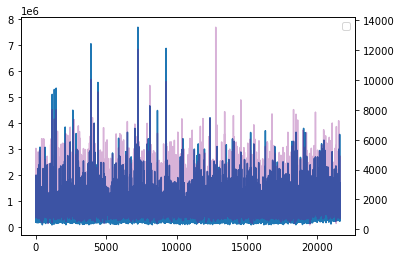

In [4]:
plt.clf()
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(price)
ax2=ax.twinx()
ax2.plot(sqft,color='purple', alpha=.3)
plt.legend()
plt.show()

In [5]:
def linear_regression(intercept, slope, features=sqft):
    return intercept+features*slope

def loss_function(intercept, slope, targets=price, features=sqft):
    # Compute the predicted values
    predictions = linear_regression(intercept, slope)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

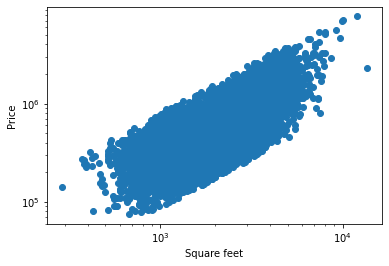

[]

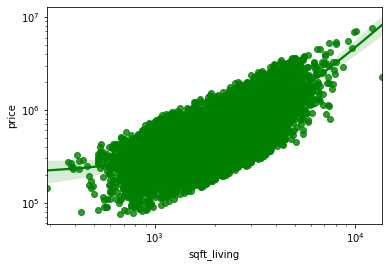

In [6]:
#slope=tf.Variable(0.1,np.float32)
#intercept=tf.Variable(0.1,np.float32)

#opt=tf.keras.optimizers.Adam()
#for j in range(1000):
#    opt.minimize(lambda: loss_function(intercept,slope),\
#    var_list=[intercept,slope])
#    print(loss_function(intercept,slope))
          
plt.scatter(sqft,price)
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.loglog()
plt.show()

sns.regplot(x='sqft_living',y='price', data=df,order=2,color='green',x_jitter=.1)
plt.loglog()

In [7]:
COLUMNS=['bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15']

TARGET='price'
X=df[COLUMNS]
y=df[TARGET]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

neuron_size=len(df[COLUMNS].columns)
data_len=len(df)
#print(housing)
housing_tensor = tf.placeholder(tf.float32, shape=[data_len,neuron_size])

dense1 = keras.layers.Dense(neuron_size, activation='sigmoid')(housing_tensor)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3,activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(5,activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)



Instructions for updating:
Colocations handled automatically by placer.

 shape of dense1:  (21613, 14)

 shape of dense2:  (21613, 3)

 shape of predictions:  (21613, 5)


In [8]:
sqft_def=tf.feature_column.numeric_column("sqft")
sqft_living_def=tf.feature_column.numeric_column("sqft_living")
sqft_lot_def=tf.feature_column.numeric_column("sqft_lot")
bedrooms_def=tf.feature_column.numeric_column("bedrooms")
bathrooms_def=tf.feature_column.numeric_column("bathrooms")
zipcode_def=tf.feature_column.numeric_column("zip")
yr_build_def=tf.feature_column.numeric_column("yr_built")
yr_renovated_def=tf.feature_column.numeric_column("yr_renovated")
rooms_def=tf.feature_column.categorical_column_with_vocabulary_list("rooms",["1","2","3","4","5"])

#feature_list=[sqft_def,sqft_living_def, sqft_lot_def,bedrooms_def,bathrooms_def,zipcode_def,yr_build_def,yr_renovated_def,rooms_def]
feature_list=[sqft_def,bedrooms_def,bathrooms_def]



features={#'sqft':np.array(sqft),
          'bedrooms':np.array(bedrooms),
          'bathrooms':np.array(bathrooms),
          'sqft_living':np.array(sqft_living),
          'sqft_lot':np.array(sqft_lot),
          'yr_built':yr_built,
          'yr_renovated':yr_renovated,
          'zipcode':zipcode
         }
labels=np.array(price)

#model0=tf.estimator.DNNRegressor(feature_columns=feature_list,hidden_units=[10,6,6,1])
#model0=tf.estimator.LinearRegressor(feature_columns=feature_list)
#model0.train((features,labels),steps=20)

In [9]:
scaler = StandardScaler()
data=pd.DataFrame(features)
scaler.fit(data)

data=scaler.transform(data)
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.3)
model=RandomForestRegressor(n_estimators=50, random_state=1111)

model.fit(X_train, y_train)

predictions=model.predict(X_test)

score=mae(y_true=y_test, y_pred=predictions)
print("{0:.2f}".format(score))

96356.64


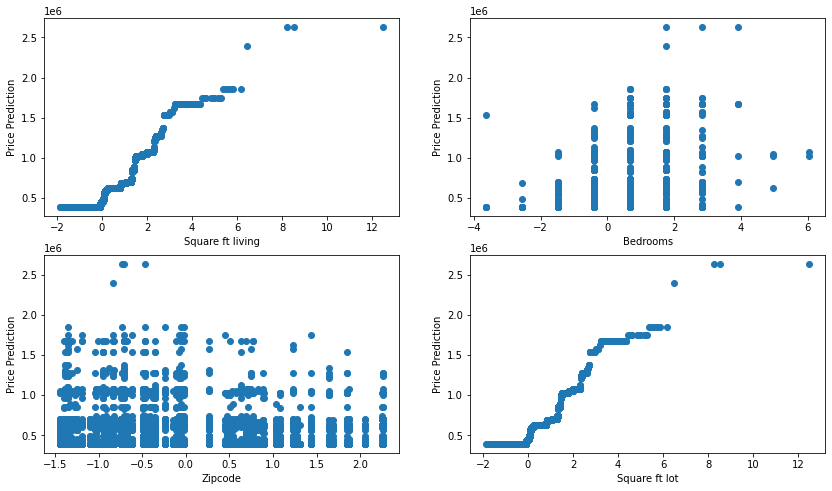

In [39]:
model = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_depth=2)
model.fit(X_train, y_train)

price_predictions=model.predict(X_test)

#print(price_predictions)
#print(len(price_predictions),len(X_test))
fig, axs= plt.subplots(2,2,figsize=(14,8))
axs[0,0].scatter(np.array(X_test[:,2]),price_predictions)
axs[0,0].set_xlabel('Square ft living')
axs[0,0].set_ylabel('Price Prediction')

axs[0,1].scatter(np.array(X_test[:,0]),price_predictions)
axs[0,1].set_xlabel('Bedrooms')
axs[0,1].set_ylabel('Price Prediction')

axs[1,0].scatter(np.array(X_test[:,6]),price_predictions)
axs[1,0].set_xlabel('Zipcode')
axs[1,0].set_ylabel('Price Prediction')

axs[1,1].scatter(np.array(X_test[:,2]),price_predictions)
axs[1,1].set_xlabel('Square ft lot')
axs[1,1].set_ylabel('Price Prediction')

plt.show()